## **Terryanda Naufaldo Arhaby**

## **1103213107**

## **Machine Learning Week 7 TugasXGBoost 1**

In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import DMatrix, train
from xgboost import plot_tree
from xgboost import plot_importance

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Replace 'your-folder-path/your-file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Define predictors and target variable based on the new dataset columns
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
X = df[predictors]

# Set the target variable
y = df['Class']

# Display the first few rows of predictors and target
X.head(), y.head()

(     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11
 0   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4
 1   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8
 2   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8
 3  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8
 4   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4,
 0    5
 1    5
 2    5
 3    6
 4    5
 Name: Class, dtype: int64)

In [4]:
# Split the data into training and validation sets (e.g., 80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the sizes of the training and validation sets
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1279, 11), (320, 11), (1279,), (320,))

In [5]:
# Define the model with a random seed for reproducibility
model = XGBRegressor(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_valid)

# Calculate the mean absolute error
mae = mean_absolute_error(y_valid, predictions)
print("Mean Absolute Error on validation set for the new dataset:", mae)

Mean Absolute Error on validation set for the new dataset: 0.41977919936180114


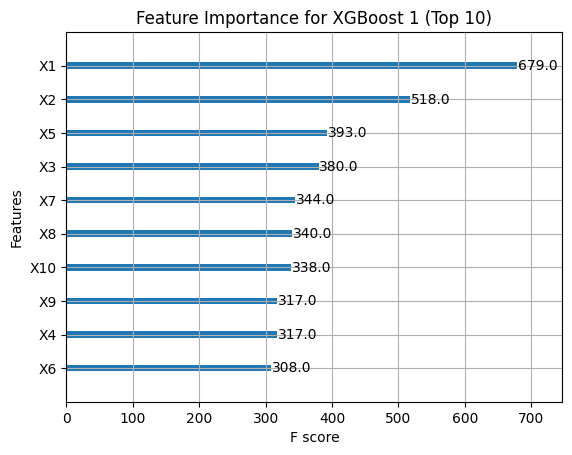

In [6]:
# Plot feature importance for XGBoost 1
plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance for XGBoost 1 (Top 10)")
plt.show()


<Figure size 2000x1000 with 0 Axes>

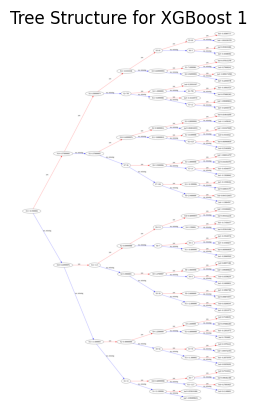

In [7]:
# Plot the first tree in the model for XGBoost 1
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')  # Change num_trees as needed
plt.title("Tree Structure for XGBoost 1")
plt.show()

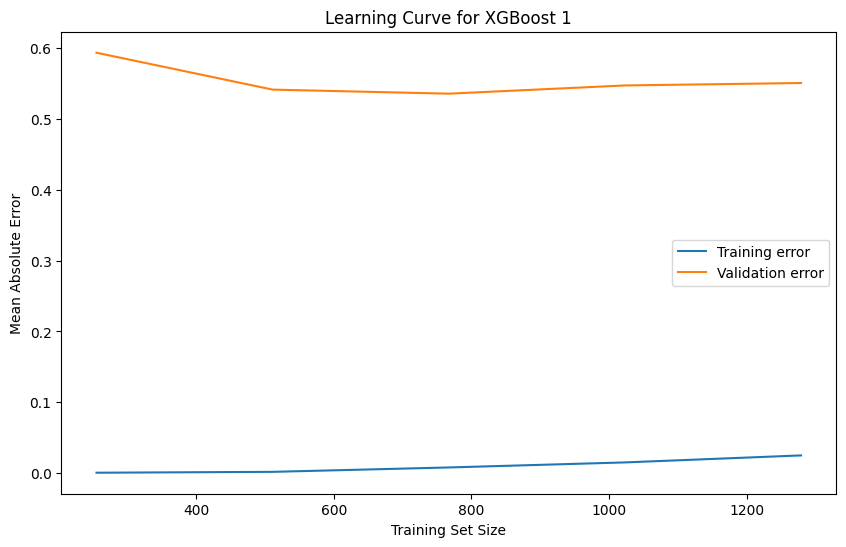

In [9]:
# Calculate the learning curve for XGBoost 1
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0], cv=5, scoring='neg_mean_absolute_error'
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = -train_scores.mean(axis=1)
valid_scores_mean = -valid_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error")
plt.plot(train_sizes, valid_scores_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve for XGBoost 1")
plt.legend()
plt.show()

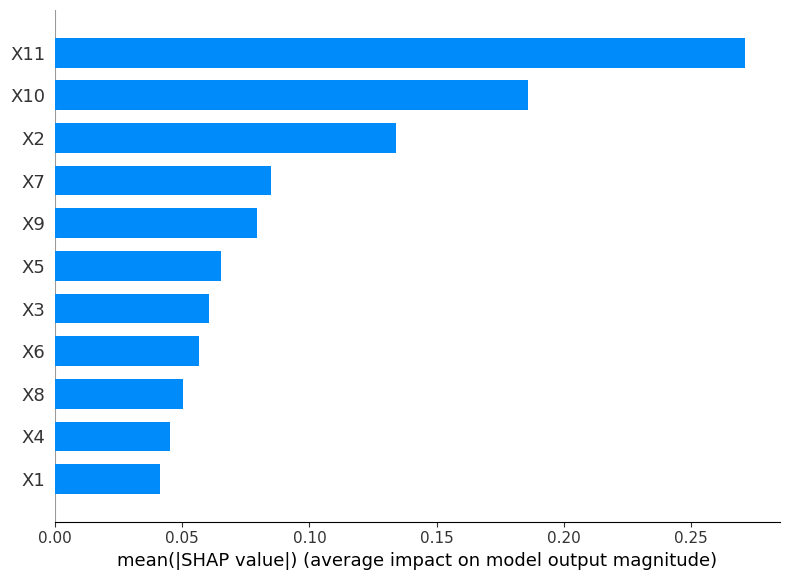

In [10]:
# Create SHAP explainer for XGBoost 1
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

# Plot summary SHAP values
shap.summary_plot(shap_values, X_valid, plot_type="bar")


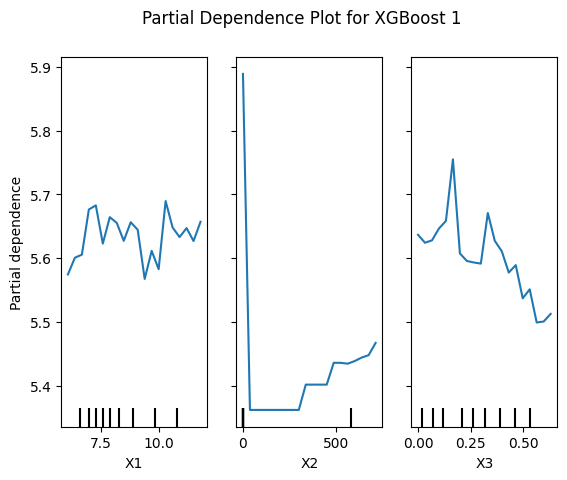

In [11]:
# Define features to plot partial dependence for
features = ['X1', 'X2', 'X3']

# Create partial dependence plot for new dataset
PartialDependenceDisplay.from_estimator(model, X_train, features, grid_resolution=20)
plt.suptitle("Partial Dependence Plot for XGBoost 1")
plt.show()